# 빅데이터분석(21_2)
### 휴먼지능정보공학과 201810793 이연우
* 14주차 과제
---
#### 14주 이진 베이지안 모델
Sklearn - make_classification() : 분류에 쓰일 데이터 생성

### 1) X, Y 데이터 생성

In [1]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [2]:
X[:5]

array([[-1.77997814,  1.61369085],
       [ 0.04231966, -2.953827  ],
       [-1.1825591 , -0.31825917],
       [-1.24965443,  0.48396096],
       [ 0.68099399, -1.94709017]])

In [3]:
Y[:5]

array([1, 0, 1, 1, 0])

### 2) X의 평균과 표준편차 계산

In [5]:
print("평균 : ", X.mean(), " 표준편차 : ", X.std())

평균 :  -0.04377170683555859  표준편차 :  1.192389266112691


### 3) 그래프
scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

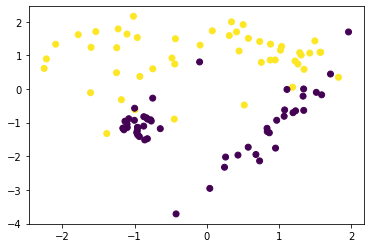

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### 4) 훈련데이터, 테스트데이터 3:1로 분리
train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### 5) 훈련데이터에 대하여 BernoulliNB 모델링
X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [8]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)

In [9]:
bnb.fit(X_train, Y_train)

BernoulliNB()

### 6) 테스트데이터에 대하여 예측값 출력
예측이 맞는지 실제값 Y와 비교해보자.

- 25개 중 1개 오류 발생 
- 정확성 : 1 - 1/25 = 0.96

In [10]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(1, 1, array([0.07656623, 1.72845088])),
 (0, 0, array([ 0.83813405, -1.26463095])),
 (1, 1, array([1.30761473, 1.00731478])),
 (1, 1, array([0.44801623, 1.1286335 ])),
 (0, 0, array([ 0.04231966, -2.953827  ])),
 (0, 0, array([-0.95937729, -1.13966798])),
 (0, 0, array([-0.74864599, -0.27264403])),
 (0, 1, array([-0.99443599, -0.61366427])),
 (0, 0, array([-0.64353054, -1.17978949])),
 (0, 0, array([-0.7771627 , -0.91606512])),
 (0, 0, array([-1.13271527, -0.95845909])),
 (1, 1, array([0.94719069, 0.86282679])),
 (0, 0, array([-0.9625056 , -1.24357844])),
 (1, 1, array([1.57866105, 1.08984118])),
 (1, 1, array([-1.10398888,  1.63145412])),
 (1, 1, array([0.57709973, 1.50315448])),
 (0, 0, array([-0.83523208, -0.85633936])),
 (1, 1, array([1.82521323, 0.34671413])),
 (0, 0, array([-1.1622917 , -1.16645512])),
 (1, 1, array([-2.2209219 ,  0.89451404])),
 (0, 0, array([-1.15594136, -1.16302549])),
 (0, 0, array([ 0.57420783, -1.72986987])),
 (1, 1, array([0.8832308 , 1.33347297])),
 (0,

In [11]:
#bnb.predict(X_train)
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 0, 1, 0, 0])

### 7) 테스트데이터에 대하여 예측과 실제의 정확성 출력
예측과 같게 나왔다

In [12]:
bnb.score(X_test, Y_test)

0.96